# Project:  Data Analysis of the 'No-show appointments' dataset from Kaggle

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
# Here I import all necessary libraries I would be using during this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='questions'></a>
### After looking at and carefully skimming through the columns of the dataframe, i've come up with some questoins on this dataframe.

- What percent of people don't show up for their appointments?
- What is the age range of people who don't show up for their appointments most?
- Between males and females, who miss their appointments the most?
- Amongst all the ailments/issues, which one seems to have the greatest impact on the amount of people who show up for appointments?
- For those that recieved SMS notifications, how did it affect their attendance?
- How did the scholarships affect attendance?
- What neighbourhood's had the most appointments missed?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Here I print out a few rows to properly inspect the column names and drop columns of no use

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### In this dataframe, I have decided to:

- Drop columns; PatientId, AppointmentID and ScheduledDay.
- Change all column names to lowercase
- Rename 'AppointmentDay' to 'appointment_day' for easy readabiility.
- Rename 'Hipertension' to 'hypertension' for clarity.
- Rename 'Handcap' to 'handicap' for easy readabiility.
- Rename 'No-show' to 'no_show' to prevent triggering errors.
- Convert all 'Yes' to 1 and 'No' to 0 in the 'No-Show' column

#### Now to check for data type issues, missing values and null data values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### From this I have decided :

- 'AppointmentDay' should be a datetime datatype
- 'No-show' to an integer datatype
- There are no missing values
- There are null values

### Data Cleaning

In [4]:
# I'm about to drop columms: PatientId, AppointmentID and ScheduledDay

df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay'], inplace=True)

In [5]:
# Next i'll change all columns to lowercase and switch the hyphen with an underscore

df.rename(columns = lambda x: x.lower().replace('-','_'), inplace=True)

In [6]:
# Renaming 'appointmentday' to 'appointment_day' 

df.rename(columns = {'appointmentday' : 'appointment_day'}, inplace=True)

In [7]:
# Renaming 'hipertension' to 'hypertension' 

df.rename(columns = {'hipertension' : 'hypertension'}, inplace=True)

In [8]:
# Renaming 'handcap' to 'handicap'

df.rename(columns = {'handcap' : 'handicap'}, inplace=True)

In [9]:
# Convert all 'Yes' to 1 and 'No' to 0 in the 'No-Show' column

df['no_show'] = df['no_show'].replace(['Yes'],1)

df['no_show'] = df['no_show'].replace(['No'],0)

In [10]:
# Converting 'appointment_day' to a datetime datatype

df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [11]:
# Converting 'no_show' to an integer datatype

df['no_show'] = df['no_show'].astype(int)

In [12]:
# Confirming new formatting has been implemented

df.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

Now I have trimmed and cleaned my data it's time to answer the questions posed earlier.

### Q1: What percent of people didn't show up for their appointment?

In [13]:
df.shape

(110527, 11)

In [14]:
# Here i'm finding the sum of the 'no_show' column; which is sum of all the ones, being those that didn't come and dividing
# it by the second element in the tuple gotten from the .shape function; which is the total number of rows, in percent.

percent = (df['no_show'].sum() / df.shape[0]) * 100
percent

20.193255946510806

### Q2: What is the age range of people who don't show up for their appointments most?

In [15]:
# just exploring the value count of the age column for outliers
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [16]:
df.query('age == -1').index

Int64Index([99832], dtype='int64')

In [17]:
df.drop([99832], inplace=True)

In [18]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [19]:
df.query('age < 37').shape[0]

54583

In [20]:
df.query('age < 37')['no_show'].sum()

12444

In [21]:
df.query('age >= 37').shape[0]

55943

In [22]:
df.query('age >= 37')['no_show'].sum()

9875

In [23]:
# plot a bar chart for the age

### Q3: Between males and females, who miss their appointments the most?


In [24]:
# Creating a dataframe for the females
df_F = df[df['gender'] == 'F']

# Finding the total number of females
df_F.shape[0]

71839

In [25]:
# Finding those who missed their appointments
sum(df_F['no_show'] == 1)

14594

In [26]:
# Finding those who attended their appointments
sum(df_F['no_show'] == 0)

57245

In [27]:
# Creating a dataframe for the males
df_M = df[df['gender'] == 'M']

# Finding the total number of females
df_M.shape[0]

38687

In [28]:
# Finding those who missed their appointments
sum(df_M['no_show'] == 1)

7725

In [29]:
# Finding those who attended their appointments
sum(df_M['no_show'] == 0)

30962

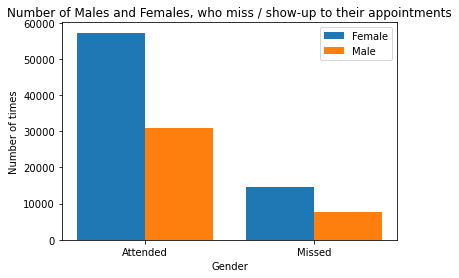

In [30]:
X = ['Attended','Missed']
Yfmale = [sum(df_F['no_show'] == 0), sum(df_F['no_show'] == 1)]
Zmale = [sum(df_M['no_show'] == 0), sum(df_M['no_show'] == 1)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yfmale, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, Zmale, 0.4, label = 'Male')
  
plt.xticks(X_axis, X)
plt.xlabel("Gender")
plt.ylabel("Number of times")
plt.title("Number of Males and Females, who miss / show-up to their appointments")
plt.legend()
plt.show()

It seems females have missed more appointments compared to males, though they have attended far more than males

### Q4: Amongst all the ailments/issues, which one seems to have the greatest impact on the amount of people who show up for appointments?

>Creating a function to plot histograms

In [31]:
def plot_hist(df, col):
    df[col].plot(kind='hist');
    plt.xlabel('No-show / Attend');

> Creating histograms to easily show their influence on the appointment attendance.

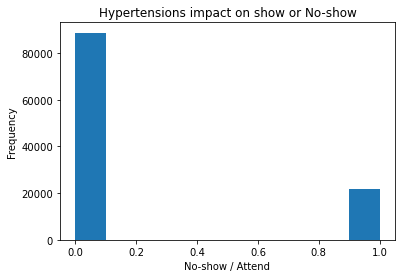

In [32]:
# Created a histogram to show the amount of patients with hypertension that missed and attended their appointments

plot_hist(df, 'hypertension')
plt.title('Hypertensions impact on show or No-show');

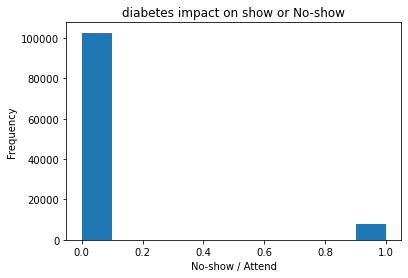

In [33]:
# Created a histogram to show the amount of patients with diabetes that missed and attended their appointments

plot_hist(df, 'diabetes')
plt.title('diabetes impact on show or No-show');

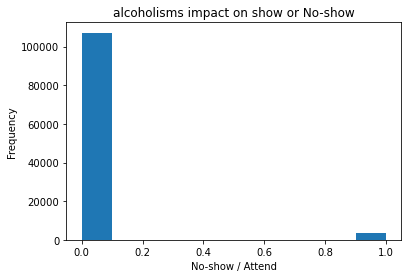

In [34]:
# Created a histogram to show the amount of patients with alcoholism that missed and attended their appointments

plot_hist(df, 'alcoholism')
plt.title('alcoholisms impact on show or No-show');

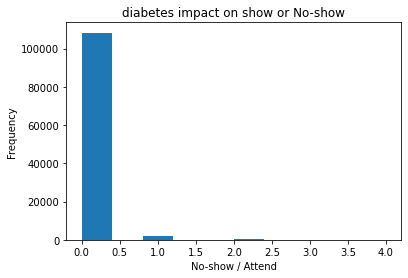

In [35]:
# Created a histogram to show the amount of patients that are handicapped and missed and attended their appointments

plot_hist(df, 'handicap')
plt.title('diabetes impact on show or No-show');

Seems from the handicap histogram, that there are values above 1

In [36]:
# Identfing and removing the wrong values

df.query('handicap > 1.0')

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,M,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,0
1665,M,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,0
1666,M,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,0
2071,M,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,0
2091,F,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,0
109484,M,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,0
109733,F,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,0
109975,M,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,0


In [37]:
# Dropping all rows with handicap greater than 1.0

df.drop(index=df.query('handicap > 1.0').index, inplace=True)

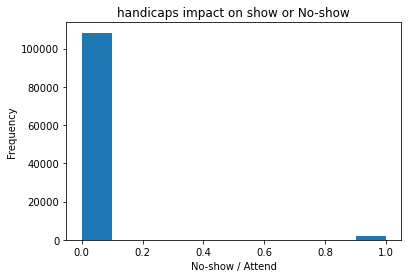

In [38]:
# Replotting the histogram

plot_hist(df, 'handicap')
plt.title('handicaps impact on show or No-show');

### Q5: For those that recieved SMS notifications, how did it affect their attendance?

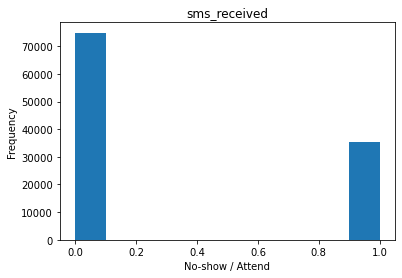

In [39]:
# Created a histogram to show the amount of patients that recieved sms notifications that missed and attended their appointments

plot_hist(df, 'sms_received')
plt.title('sms_received');

In [40]:
# Creating a dataframe for those that recieved the notifications

df_recieved = df.query('sms_received == 1')

df_recieved.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
11,M,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1
15,F,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,0
18,F,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0
22,M,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1
25,M,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,0


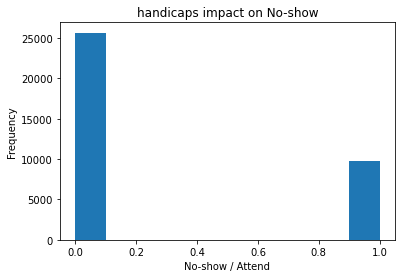

In [41]:
# Plotting a histogram to see those that missed

plot_hist(df_recieved, 'no_show')
plt.title('handicaps impact on No-show');

### Q6: How did the scholarships affect attendance?

Text(0.5, 1.0, 'Total show and no-show for appointments')

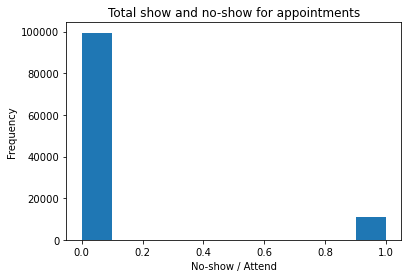

In [42]:
# Created a histogram to show the amount of patients with  that missed and attended their appointments

plot_hist(df, 'scholarship')
plt.title('Total show and no-show for appointments')

In [43]:
# Creating a dataframe for those that recieved the scholarships

df_recieved2 = df.query('scholarship == 1')

df_recieved2.head()

,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
12,F,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,0
17,F,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1
18,F,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0
31,M,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,1
33,F,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,0


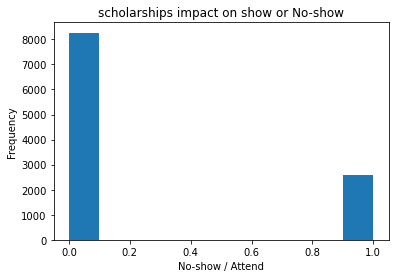

In [44]:
# Plotting a histogram to see those that missed

plot_hist(df_recieved2, 'no_show')
plt.title('scholarships impact on show or No-show');

### Q7: What neighbourhood's had the most appointments missed?

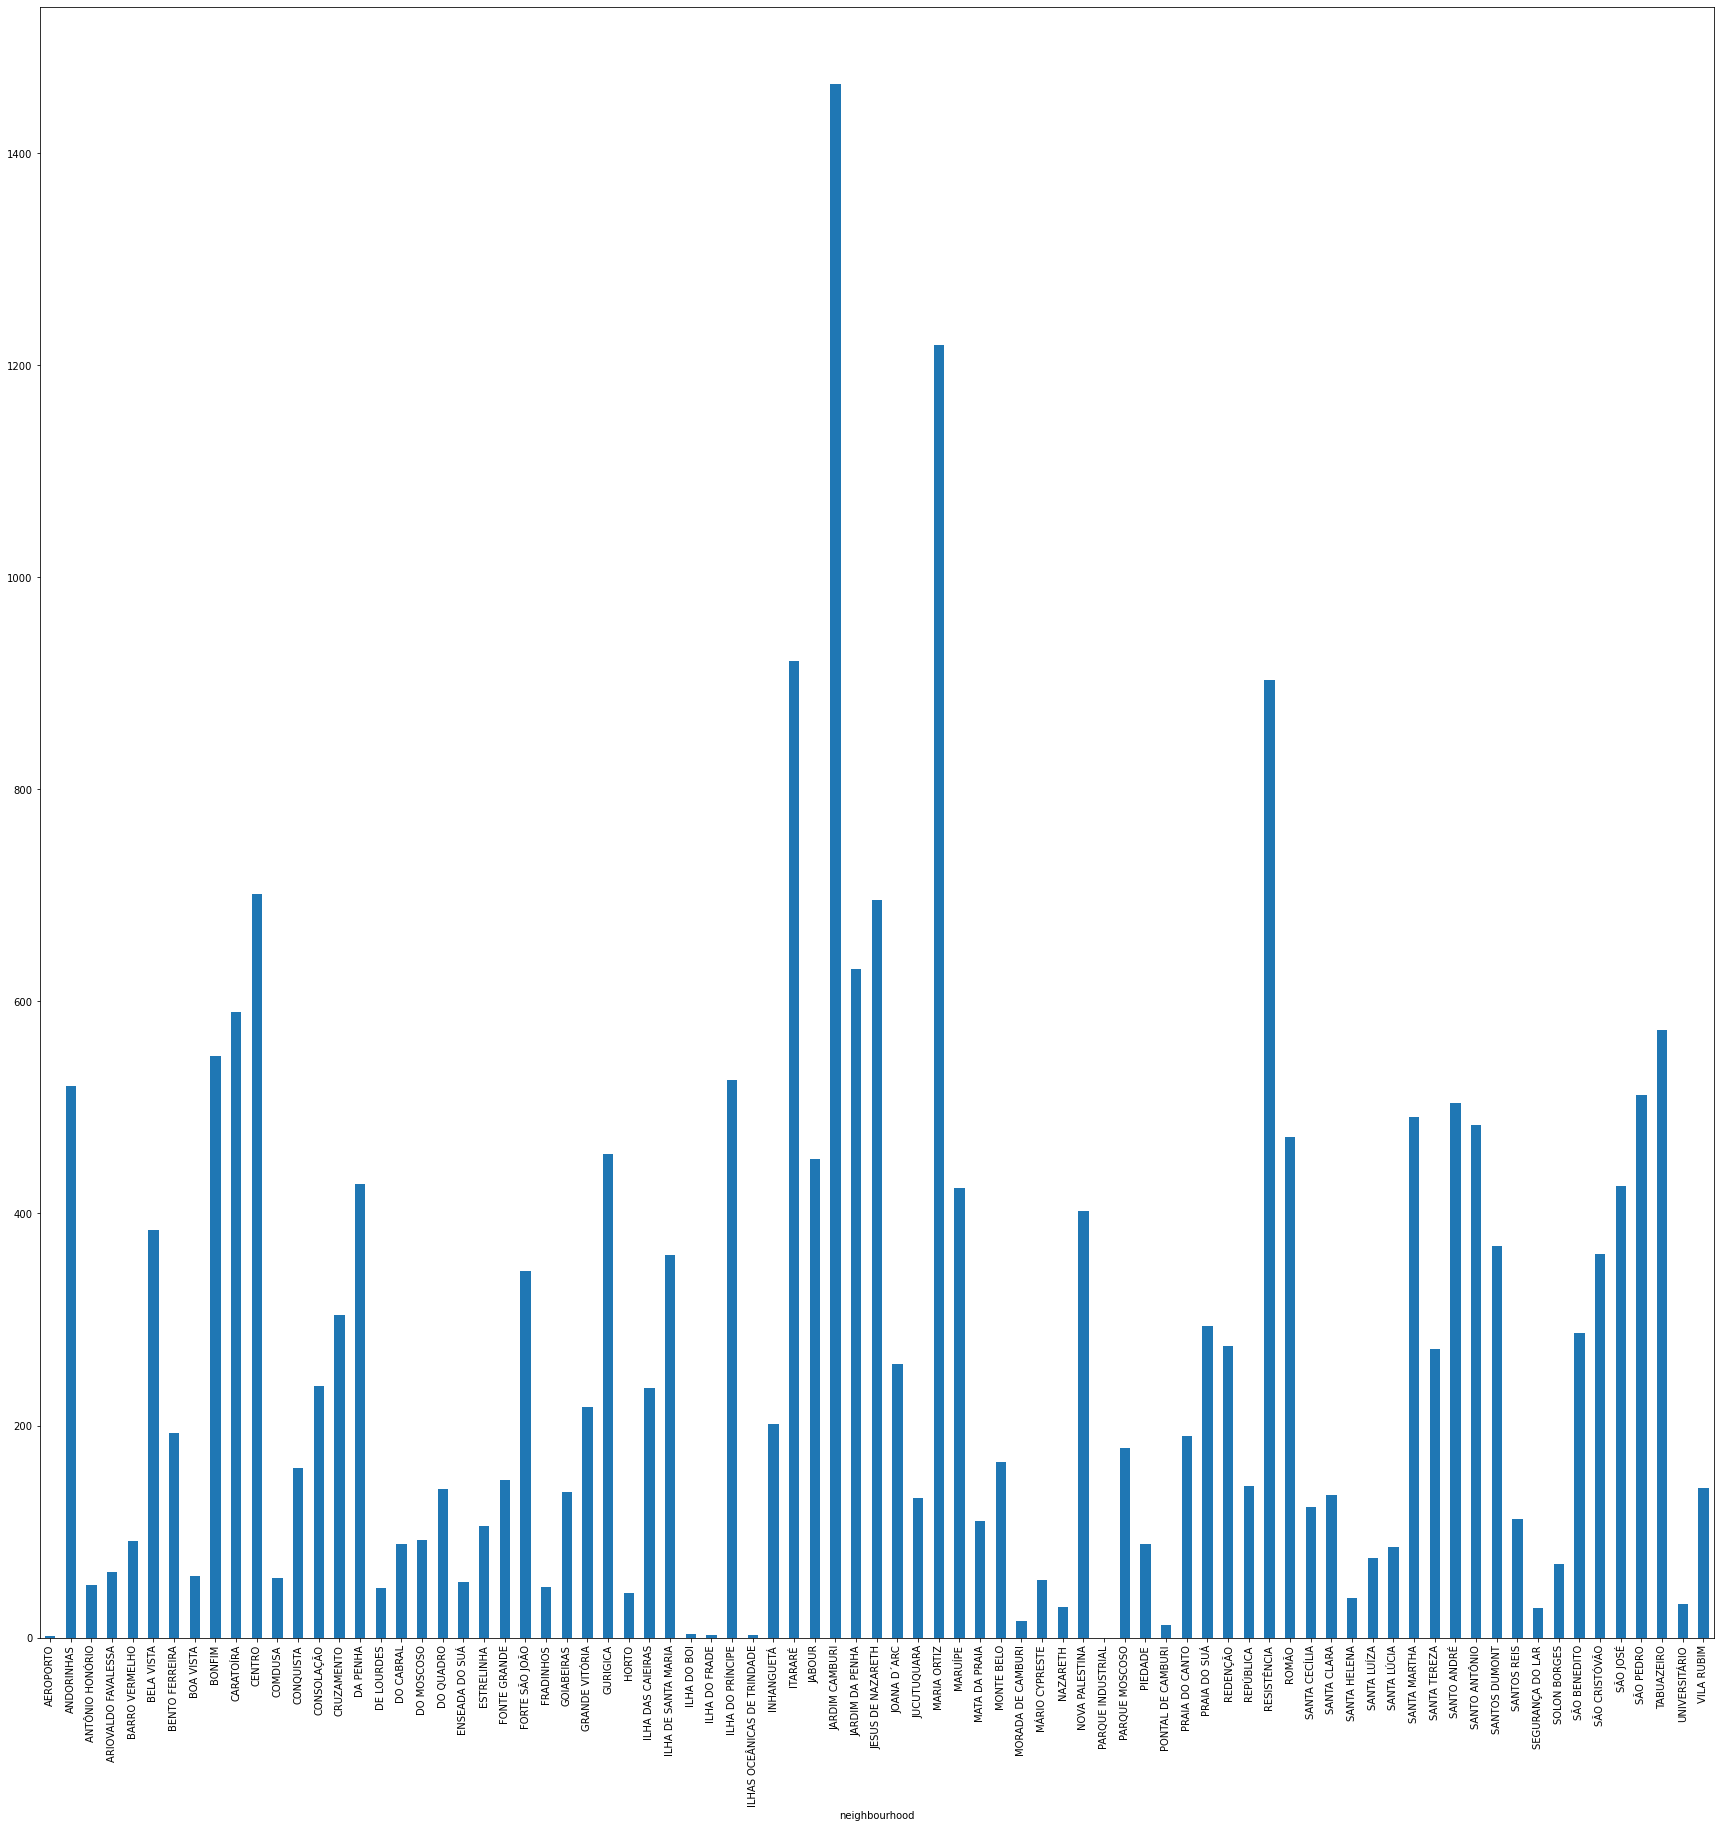

In [45]:
# Creating a dataframe for the neighbourhoods

housing = df.groupby('neighbourhood')['no_show'].sum()

# Plotting a barchart for the neighbourhoods

housing.plot(kind='bar', figsize=(30,30));

<a id='conclusions'></a>
## Conclusions


After performing my explorartory data analysis I have come up with these answers: 

**Q1:** From my analysis, about 20% of the patients didn't show up for their appointment.

**Q2:** From my analysis, the average age of patients was 37 years old. And it seems to be that majority of patients who didn't attend were below the age of 37 adding a total of 12,444 appointments missed to the tally.

**Q3:** From my analysis, 14,594 patients who missed their appointments were females. While, the remaining 7725 patiets who missed were males. Though majority of patients who attended their appointments were females.

**Q4:** From my analysis, majority of patients who missed their appointments had hypertension amongst possible others.

**Q5:** From my analysis, though about 20,000+ patients recieved their notifications, about half of them still didn't come.

**Q6:** From my analysis, though about ~ 20,000 patients recieved scholarships, about 3000 patients didn't come for their appointments.

**Q7:** From my analysis, over 3,400 patients from Jardim Camburi neighbourhood didn't make their appointment. Forming the largest NO_SHOW neighbourhood.

<a id='limitations'></a>
# Limitations

> Though this conclusions may have been drawn, I feel the dataset has been biased in favor of the females. The female population size is more than double that of the male, hence skewing some conclusions in favor of the females. As seen in coonclusion 3; the females have a higher number in both those that attended and missed.